In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel("spam.xlsx")

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2949,ham,Where are you ? You said you would be here whe...,NaN,NaN,NaN
571,ham,Do you know where my lab goggles went,NaN,NaN,NaN
4153,ham,Haf u eaten? Wat time u wan me 2 come?,NaN,NaN,NaN
690,ham,Was the farm open?,NaN,NaN,NaN
39,ham,Hello! How's you and how did saturday go? I wa...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1.Data Cleaning

In [10]:
# drop 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [11]:
df.sample(5)

,v1,v2
3366,ham,Hey what are you doing. Y no reply pa..
4687,ham,Hmmm.but you should give it on one day..
1436,ham,I jus hope its true that missin me cos i'm re...
4358,ham,ÌÏ only send me the contents page...
3870,ham,Yeah my usual guy's out of town but there're d...


In [12]:
#rename column names
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [13]:
df.sample(5)

,Target,Text
2784,ham,"K, wat s tht incident?"
3201,ham,Okay lor... Wah... like that def they wont let...
833,ham,Thank you so much. When we skyped wit kz and s...
3003,spam,You've won tkts to the EURO2004 CUP FINAL or å...
4870,ham,Well. You know what i mean. Texting


In [14]:
df["Target"].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
#label a number to ham and spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df["Target"] = encoder.fit_transform(df["Target"])

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [19]:
#check duplicate value
df.duplicated().sum()

403

In [20]:
#remove duplicate value
df = df.drop_duplicates(keep="first")

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

## 2.EDA

In [23]:
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

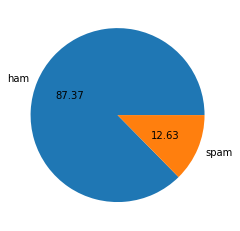

In [24]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

In [70]:
!pip install nltk

In [25]:
import nltk

In [113]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
df["Text"] = df["Text"].astype(str)

In [28]:
df["Num_characters"] = df["Text"].apply(len)

In [29]:
df

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [30]:
#number of words
df["Num_words"] = df["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df["Num_sentences"] = df["Text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [34]:
df.describe()

,Target,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.980267,18.455407,1.961308
std,0.332253,58.239404,13.322448,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [35]:
#ham
df[df["Target"] == 0][["Num_characters","Num_words","Num_sentences"]].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.123339,1.815545
std,56.362288,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df["Target"] == 1][["Num_characters","Num_words","Num_sentences"]].describe()

,Num_characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [67]:
import seaborn as sns

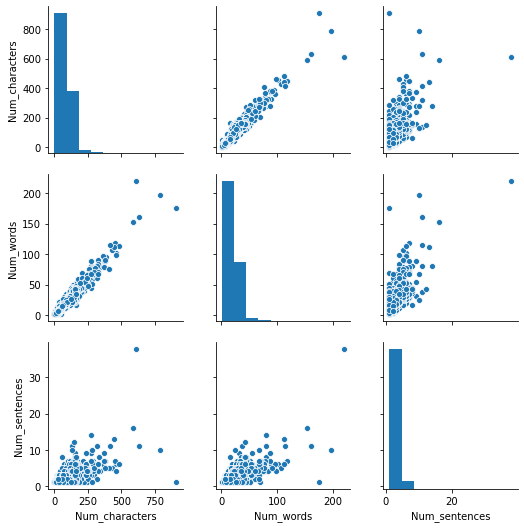

In [80]:
sns.pairplot(df[["Num_characters","Num_words","Num_sentences"]])

<AxesSubplot:>

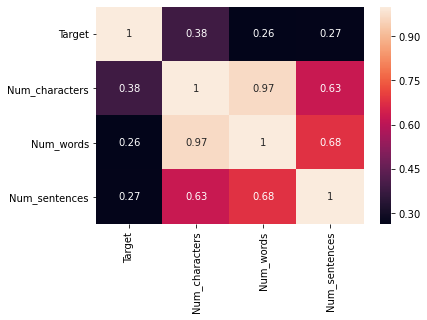

In [82]:
sns.heatmap(df.corr(),annot=True)

## 3.Data Preprocessing

- Lower case
- Tokenization
- Removing Special Characters
- Removing stop words and punctuation
- Stemming

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [90]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [92]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [100]:
df["Transformed_text"] = df['Text'].apply(transform_text)

In [103]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [104]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [105]:
spam_wc = wc.generate(df[df["Target"] == 1]["Transformed_text"].str.cat(sep=" "))

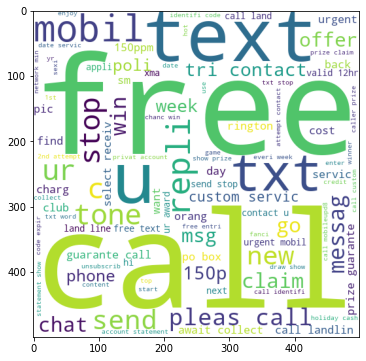

In [107]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [108]:
ham_wc = wc.generate(df[df["Target"] == 0]["Transformed_text"].str.cat(sep=" "))

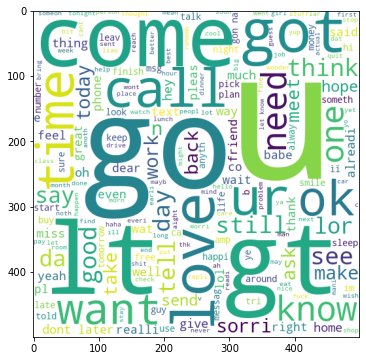

In [109]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [113]:
spam_corpus=[]
for msg in df[df["Target"]==1]["Transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [115]:
len(spam_corpus)

9939

In [120]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [121]:
ham_corpus=[]
for msg in df[df["Target"]==0]["Transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [124]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## 4.Model Building

In [182]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [183]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [184]:
X.shape

(5169, 3000)

In [186]:
y = df['Target'].values

In [174]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [189]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [190]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [191]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[792 104]
 [ 25 113]]
0.5207373271889401


In [192]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [193]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [194]:
# tfidf --> MNB

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [200]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [201]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [202]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [203]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [204]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.925531914893617
Precision -  0.8080808080808081
For  LR
Accuracy -  0.9574468085106383
Precision -  0.97
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.963963963963964
For  BgC
Accuracy -  0.9555125725338491
Precision -  0.859375
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286


In [205]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [206]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
8,ETC,0.978723,0.975410
0,SVC,0.975822,0.974790
5,RF,0.970986,0.973684
4,LR,0.957447,0.970000
6,AdaBoost,0.966151,0.963964
9,GBDT,0.947776,0.928571
7,BgC,0.955513,0.859375
3,DT,0.925532,0.808081


In [207]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [208]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,ETC,Accuracy,0.978723
3,SVC,Accuracy,0.975822
4,RF,Accuracy,0.970986
5,LR,Accuracy,0.957447
6,AdaBoost,Accuracy,0.966151
7,GBDT,Accuracy,0.947776
8,BgC,Accuracy,0.955513
9,DT,Accuracy,0.925532


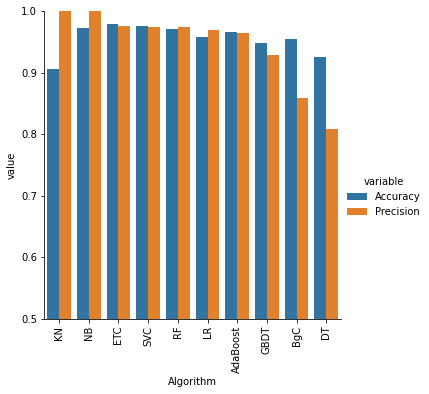

In [209]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [211]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [216]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values(by='Precision_scaling',ascending=False)

In [217]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [218]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [219]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [220]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410,0.978723,0.975410
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,RF,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
5,LR,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000,0.957447,0.970000
6,AdaBoost,0.966151,0.963964,0.966151,0.963964,0.966151,0.963964,0.966151,0.963964
7,GBDT,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571,0.947776,0.928571
8,BgC,0.955513,0.859375,0.955513,0.859375,0.955513,0.859375,0.955513,0.859375
9,DT,0.925532,0.808081,0.925532,0.808081,0.925532,0.808081,0.925532,0.808081


In [221]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [222]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [223]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [224]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [225]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [226]:
from sklearn.ensemble import StackingClassifier

In [228]:
clf  = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [229]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
